# Proyek Analisis Data: [Bike Sharing Dataset]

Data Diri <br>
Nama : Mochamad Yusuf <br>
Email : mochyusuf100@gmail.com <br>
Username : mochyusuf <br>
Telepon : +6285221120369

# Menentukan Pertanyaan Bisnis Atau Analisis

1. Berapa total terpinjam pada bulan Januari 2011 ?
2. Bagaimana rata-rata jumlah penyewaan sepeda bervariasi di berbagai bulan dalam setahun?
3. Berapa perbandingan pengguna casual & register ?
4. Bagaimana tren penggunaan sepeda selama tahun 2011 dan tahun 2012 ?

# Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

# Data Wrangling
Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Get Data Hari
df_day = pd.read_csv("/content/drive/MyDrive/data/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Get Data Jam
df_hour = pd.read_csv("/content/drive/MyDrive/data/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# **Assessing Data**


In [5]:
# memeriksa tipe data df_day dari tiap kolom yang terdapat dalam data.
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# memeriksa tipe data df_hour dari tiap kolom yang terdapat dalam data.
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# mengecek missing value dalam tabel data df_day
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
# mengecek missing value dalam tabel data df_hour
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
# Memeriksa Parameter Statistik pada Data df_day
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Memeriksa Parameter Statistik pada Data df_hour
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
# mengecek duplikat data dalam tabel df_day
print("Jumlah duplikat data: ", df_day.duplicated().sum())

Jumlah duplikat data:  0


In [12]:
# mengecek duplikat data dalam tabel df_hour
print("Jumlah duplikat data: ", df_hour.duplicated().sum())

Jumlah duplikat data:  0


# **Cleaning Data**


In [13]:
# Ubah `dteday` menjadi waktu-tanggal
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_day['dteday'])

# Ekstrak tahun, bulan, dan hari dari `dteday` untuk df_day
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month
df_day['day'] = df_day['dteday'].dt.day

# Ekstrak tahun, bulan, hari, dan jam dari `dteday` untuk df_hour
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day'] = df_hour['dteday'].dt.day
df_hour['hour'] = df_hour['dteday'].dt.hour

In [14]:
# check data df_day
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,6.519836,15.738714
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,1.000000,1.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,4.000000,8.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,7.000000,16.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,10.000000,23.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,12.000000,31.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,3.451913,8.809949


In [15]:
# check data df_hour
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,year,month,day,hour
count,17379.0000,731,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,731.000000,731.000000,731.000000,731.0
mean,8690.0000,2012-01-01 00:00:00,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.500684,6.519836,15.738714,0.0
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.0
25%,4345.5000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,4.000000,8.000000,0.0
50%,8690.0000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,7.000000,16.000000,0.0
75%,13034.5000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,10.000000,23.000000,0.0
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,12.000000,31.000000,0.0
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500342,3.451913,8.809949,0.0


# Exploratory Data Analysis (EDA)


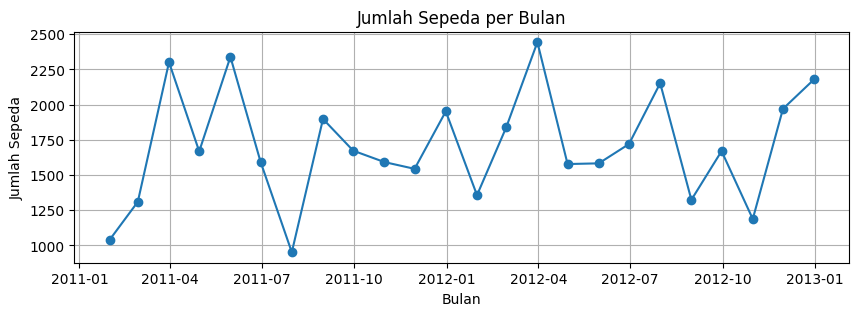

In [16]:
# Lihat Jumlah Sepeda Per bulan
bulanan = df_hour.groupby(pd.Grouper(key='dteday', freq='ME')).sum()
plt.figure(figsize=(10, 3))
plt.plot(bulanan.index, bulanan['cnt'],marker='o',linestyle='-')
plt.title('Jumlah Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda')
plt.grid(True)
plt.show()

In [17]:
# Pivot data per tahun
df_hour.groupby(by='year').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
}).sort_values(by='cnt',ascending=True)


,casual,registered,cnt
year,,,
2011.0,1741,18121,19862
2012.0,1438,19565,21003


In [18]:
# Hitung rata-rata penyewaan per bulan
monthly_avg_rentals = df_day.groupby(df_day['dteday'].dt.month)['cnt'].mean().reset_index()
monthly_avg_rentals.columns = ['bulan', 'cnt']
monthly_avg_rentals.head()

,bulan,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3692.258065
3,4,4484.900000
4,5,5349.774194


# **Visualization & Explanatory Analysis**


**Pertanyaan 1**

Berapa total terpinjam pada bulan Januari 2011

In [23]:
total = df_hour[(df_hour['yr'] == 1) & (df_hour['mnth'] == 1)]['cnt'].sum()

print("Total terpinjam pada bulan Januari 2011:", total)

Total terpinjam pada bulan Januari 2011: 96744


**Pertanyaan 2**

Bagaimana rata-rata jumlah penyewaan sepeda bervariasi di berbagai bulan dalam setahun?

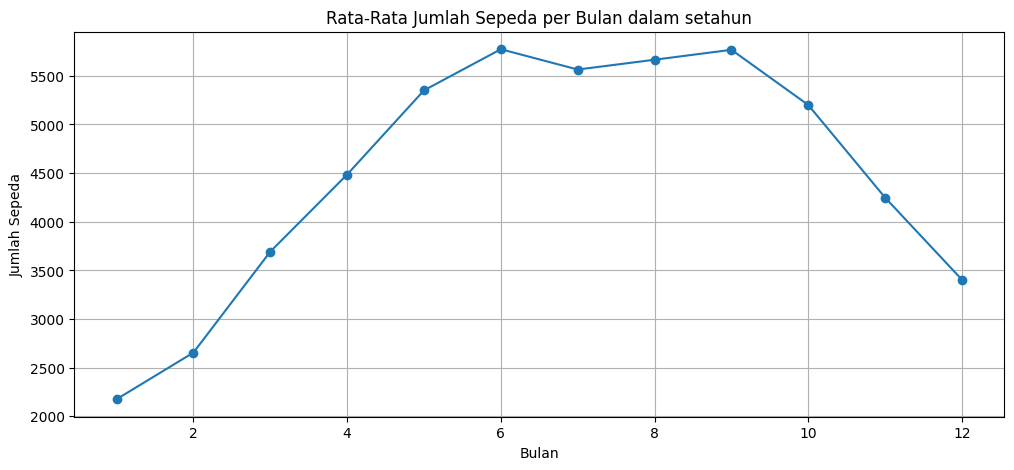

In [20]:
# Lihat Rata-Rata Jumlah Sepeda Per bulan dalam setahun
bulanan = monthly_avg_rentals.groupby(pd.Grouper(key='bulan')).sum()
plt.figure(figsize=(12, 5))
plt.plot(bulanan.index, bulanan['cnt'],marker='o',linestyle='-')
plt.title('Rata-Rata Jumlah Sepeda per Bulan dalam setahun')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda')
plt.grid(True)
plt.show()

**Pertanyaan 3**

Berapa perbandingan pengguna casual & register ?

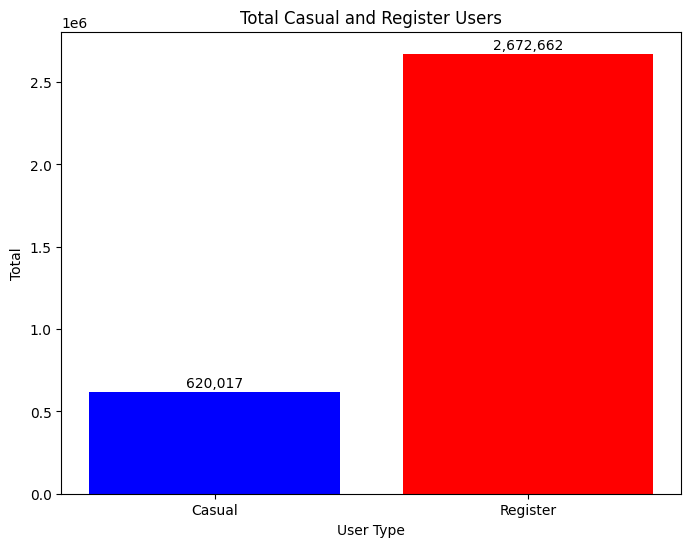

In [21]:
# Hitung total keseluruhan dari 'casual' dan 'register'
total_casual = df_hour['casual'].sum()
total_register = df_hour['registered'].sum()

# Data
categories = ['Casual', 'Register']
totals = [total_casual, total_register]

# Buat chart
plt.figure(figsize=(8, 6))
plt.bar(categories, totals, color=['blue', 'red'])

# Tambahkan label dan judul
plt.xlabel('User Type')
plt.ylabel('Total')
plt.title('Total Casual and Register Users')

# Tambahkan nilai di atas bar
for i, value in enumerate(totals):
    plt.text(i, value + 10000, f'{value:,}', ha='center', va='bottom')

# Tampilkan grafik
plt.show()

**Pertanyaan 4**

Bagaimana tren penggunaan sepeda selama tahun 2011 dan tahun 2012 ?

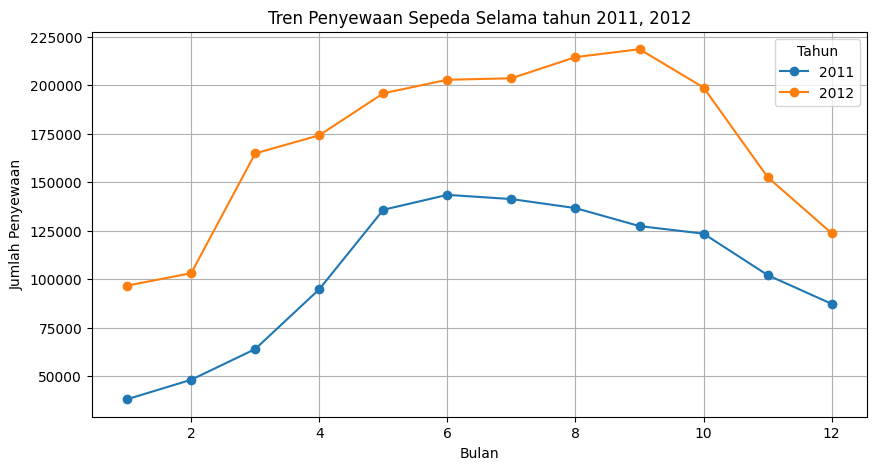

In [22]:
# Menghitung jumlah pelanggan per bulan
monthly_counts = df_day.groupby(['year', 'month']).agg({
    'cnt': 'sum'
}).reset_index()

# Mengubah index bulan ke nomor bulan yang tepat, menambahkan kolom baru *month_num*
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
monthly_counts['month_num'] = monthly_counts['month'].apply(lambda x: month_order.index(x) + 1)

# Mengurutkan data berdasarkan tahun dan bulan
monthly_counts = monthly_counts.sort_values(by=['year', 'month_num'])

# Melakukan plotting
plt.figure(figsize=(10, 5))
for year in monthly_counts['year'].unique():
    subset = monthly_counts[monthly_counts['year'] == year]
    plt.plot(subset['month'], subset['cnt'], marker='o', label=year)

plt.title('Tren Penyewaan Sepeda Selama tahun 2011, 2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Tahun')
plt.grid(True)

# Menampilkan chart
plt.show()


# **Conclusion**


*   Conclution pertanyaan 1: Berapa total terpinjam pada bulan Januari 2011 yaitu 123713
*   Conclution pertanyaan 2:  Bagaimana rata-rata jumlah penyewaan sepeda bervariasi di berbagai bulan dalam setahun sangat berbeda pada bulan 5 sampai 9 atau musim panas
*   Conclution pertanyaan 3:  Berapa perbandingan pengguna casual & register yaitu pengguna register lebih banyak sebesar 672.662 sedangkan casual hanya 620.017
*   Conclution pertanyaan 4:  Bagaimana tren penggunaan sepeda selama tahun 2011 dan tahun 2012 yaitu penyewaan sepeda selama dua tahun menunjukkan pola musiman yang kuat, dengan peningkatan selama bulan-bulan di musim panas dan penurunan selama di musim dingin.
